# Autofocus 
This is a notebook to provide a boilerplate for an autofocus routine triggered by the imswitch client.


In [ ]:
import imswitchclient.ImSwitchClient as imc
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

# Connect to ImSwitch
if 0:
    hostname = "imswitch.openuc2.com"  # Change to the hostname of the computer running ImSwitch
    port = 443
else:
    hostname = "localhost"
    port = 8001
isHttps = True
client = imc.ImSwitchClient(host=hostname, port=port, isHttps=isHttps)


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [7]:

# Move to some initial X/Y, e.g. a "top-left" corner for the raster
client.positionersManager.movePositioner(None, "X", 0, is_absolute=True, is_blocking=True)
client.positionersManager.movePositioner(None, "Y", 0, is_absolute=True, is_blocking=True)

# Retrieve current position
positioner_name = client.positionersManager.allStageNames[0]
current_positions = client.positionersManager.getPositionerPositions()[positioner_name]
initial_pos_x = current_positions["X"]
initial_pos_y = current_positions["Y"]

# Retrieve the pixel size from the objective (microns per pixel)
# Adjust function name as appropriate if it differs in your actual code
px_size_microns = client.objectiveController.getStatus()['pixelsize']
print(f"Pixel size: {px_size_microns} microns")

# Capture one test image to determine width/height in pixels
test_img = client.recordingManager.snapNumpyToFastAPI()
height, width = test_img.shape  # Assuming a single-channel image

# Define raster dimensions
nx, ny = 10, 10  # 10 x 10 tiles

# Create a blank canvas for stitching (rows = ny*height, cols = nx*width)
stitched_img = np.zeros((ny * height, nx * width), dtype=test_img.dtype)

# Perform the raster scan
for j in range(ny):
    for i in range(nx):
        # Calculate where to move based on pixel size and tile index
        # (assuming stage coordinates in microns, adjust if needed)
        target_x = initial_pos_x + i * (px_size_microns * width)
        target_y = initial_pos_y + j * (px_size_microns * height)

        client.positionersManager.movePositioner(None, "X", target_x, is_absolute=True, is_blocking=True)
        client.positionersManager.movePositioner(None, "Y", target_y, is_absolute=True, is_blocking=True)
        time.sleep(0.2)  # Brief pause to allow the stage/camera to settle

        # Acquire image for this tile
        tile_img = client.recordingManager.snapNumpyToFastAPI()

        # Calculate the placement on the stitched canvas
        row_offset = j * height
        col_offset = i * width
        stitched_img[row_offset: row_offset + height, col_offset: col_offset + width] = tile_img



/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

Pixel size: 0.2 microns


/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/bene/mambaforge/envs/intel_env/lib/python3.11/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host '0.0.0.0'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/ben

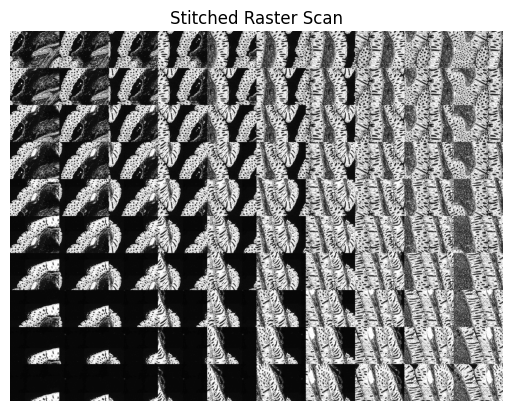

In [8]:
# Visualize the final stitched image
plt.figure()
plt.imshow(stitched_img, cmap='gray')
plt.title("Stitched Raster Scan")
plt.axis("off")
plt.show()
